# Usando Runge-Kutta o Euler

In [203]:
#Librerias
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [204]:

#Metodos de integracion y definicion de variables
def Metodo_euler(F, X_0, t):
    l = 1    #metros
    g = 9.81 # metros/segundos**2
    m = 1    #kg
    
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X_0)])
    X[0] = X_0
    for i in range(nt-1):
        X[i+1] = X[i] + F(X[i], t[i],g,l,m) * dt
    return X

def RK4(f, X_0, t):
    l = 1    #metros
    g = 9.81 # metros/segundos**2
    m = 1    #kg
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X_0)])
    X[0] = X_0
    for i in range(nt-1):
        k1 = f(X[i], t[i],g,l,m)
        k2 = f(X[i] + dt/2. * k1, t[i] + dt/2.,g,l,m)
        k3 = f(X[i] + dt/2. * k2, t[i] + dt/2.,g,l,m)
        k4 = f(X[i] + dt    * k3, t[i] + dt,g,l,m)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

l = 1    #metros
g = 9.81 # metros/segundos**2
m = 1    #kg

#condicion inicial
x_0 = [0,3]
#plot time
t = np.linspace(0,20,2000)


In [205]:
#definir el sistema de ecuaciones y elegir el sistema de integracion para graficar
def Sistema(x,t,g,l,m):
    l = 1    #metros
    g = 9.81 # metros/segundos**2
    m = 1    #kg
    x1 = x[0]
    x2 = x[1]
    dx1_dt = x2
    dx2_dt = -g*math.sin(x1)
    #seleccuonar np.array si es Euler o Runge, si no, el otro renglon
    dx_dt = np.array([dx1_dt,dx2_dt])
    #dx_dt = [dx1_dt,dx2_dt]
    return dx_dt

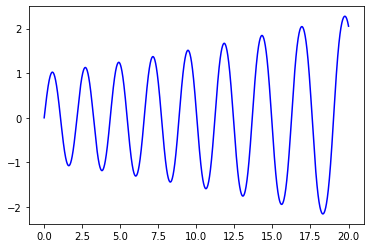

Wall time: 279 ms


In [206]:
%%time


X = Metodo_euler(Sistema,x_0,t)
#X = RK4(Sistema,x_0,t)

plt.plot(t,X[:,0],'b-')

plt.show()



# Usando odeint

In [207]:

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

l = 1    #metros
b = 0.0
g = 9.81 # metros/segundos**2
m = 1    #kg

#condicion inicial
x_0 = [0,3]
#plot time
t = np.linspace(0,20,240)


def Sistema(x,t,b,g,l,m):
    l = 1    #metros
    b = 0.0
    g = 9.81 # metros/segundos**2
    m = 1    #kg
    x1 = x[0]
    x2 = x[1]
    dx1_dt = x2
    dx2_dt =-g*math.sin(x1)
    dx_dt = [dx1_dt,dx2_dt]
    return dx_dt

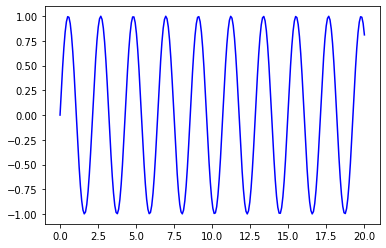

Wall time: 277 ms


In [208]:
%%time
#Usar odeint y graficar 
X = odeint(Sistema,x_0,t,args = (b,g,l,m))


plt.plot(t,X[:,0],'b-')
plt.show()